# Shareholder deck; data miner

In [1]:
from DBS_utils import *

## Make list of companies

In [2]:
PWD = "/Users/antongolles/Documents/Work/ITU-Research/DBS_textual/"
relative_location = "../data/Shareholder_decks/"
list_dir = os.listdir(PWD+relative_location)

companies = get_company_names(list_dir)
text_dicts = get_text_dicts(list_dir)
#print('companies: ',companies, '\n text dicts: ',[i[33:] for i in text_dicts])
#print("Number of companies = ", len(companies))

## extract text and save as dictionary

In [3]:
print("Number of companies = ", len(companies))
#make_text_dictionary(companies, PWD, relative_location,build_on_date='2022-05-18')

Number of companies =  91


## Load dictionary

In [7]:
date_today = str(date.today())
date_latest = '2022-05-18'

file = np.load(relative_location+f'text_from_shareholder_decks_{date_latest}.npz', allow_pickle=True)
#file = np.load(relative_location+'../'+f'text_from_shareholder_decks_{date_latest}.npz', allow_pickle=True)
text_dict = file[file.files[0]].item()
text_dict['google']['google_2020_Q2']['text'][:100]

'Alphabet Announces Second Quarter 2020 Results\n\nMOUNTAIN  VIEW,  Calif.  –  July  30,  2020  – Alpha'

## Cleaning

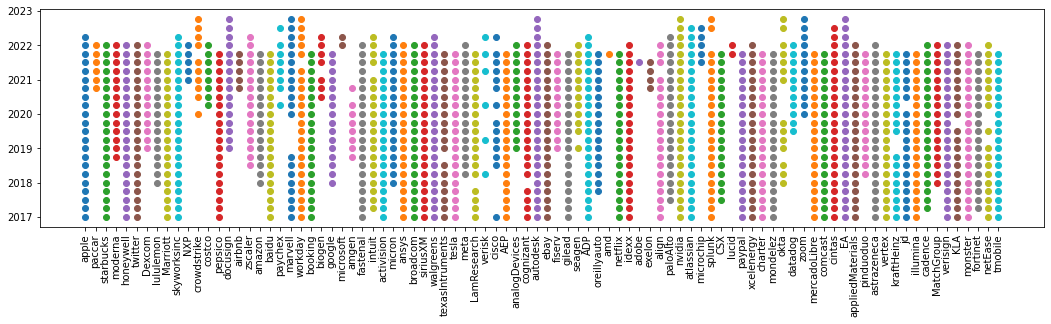

In [4]:
# Lets see if we have an appropriate number of each
fullness_dict = {}
for company in text_dict.keys():
    fullness_dict[company] = []
    for report in text_dict[company].keys():
        year, quarter = int(report.split('_')[1]), int(report.split('_')[2][1])
        fullness_dict[company].append(year+quarter*.25-.25)

        
plt.figure(figsize=(18,4))
for index,company in enumerate(fullness_dict.keys()):
    plt.scatter([index]*len(fullness_dict[company]), fullness_dict[company])
    
plt.xticks(range(len(fullness_dict.keys())), fullness_dict.keys(), rotation=90);

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


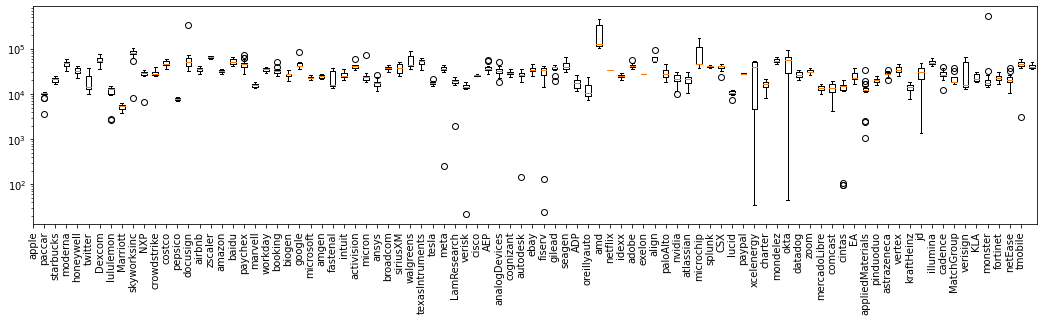

In [5]:
# Lets have a look at whether the lengths are approximately the same for different reports of a single company
lengths = [[len(text_dict[company][report]['text']) for report in text_dict[company].keys()] for company in text_dict.keys()]

plt.figure(figsize=(18,4))
plt.boxplot(lengths)
plt.xticks(range(len(fullness_dict.keys())), fullness_dict.keys(), rotation=90);
plt.yscale('log')

In [6]:
# Lets find the outliers
lengths_company = {}
for company in text_dict.keys():
    lengths_company[company] = {}
    for report in text_dict['monster'].keys():
        try:
            report = company+'_'+'_'.join(report.split('_')[1:])
            report_length = len(text_dict[company][report]['text']) 
        except:
            report_length = None
        lengths_company[company][''.join(report.split('_')[1:])] = report_length 
lengths_df = pd.DataFrame.from_dict((lengths_company)).sort_index()
lengths_df

,apple,paccar,starbucks,moderna,honeywell,twitter,Dexcom,lululemon,Marriott,skyworksinc,...,jd,illumina,cadence,MatchGroup,verisign,KLA,monster,fortinet,netEase,tmobile
2017Q1,8161,NaN,31793,NaN,18805,47496,NaN,NaN,78013.0,6463,...,45005.0,30638.0,NaN,NaN,27302,17118.0,16406,NaN,38851.0,34762.0
2017Q2,3636,NaN,40306,NaN,22338,36445,NaN,NaN,102215.0,31254,...,51328.0,32742.0,16961.0,NaN,21397,17201.0,20547,16774.0,38063.0,38388.0
2017Q3,8068,NaN,44455,NaN,20695,52250,NaN,NaN,102149.0,31413,...,59501.0,30439.0,16688.0,NaN,20514,16517.0,20026,10618.0,40630.0,39501.0
2017Q4,9695,NaN,59081,NaN,26205,52495,NaN,NaN,7935.0,33629,...,61987.0,31982.0,24129.0,NaN,22775,519796.0,22483,12653.0,54381.0,47645.0
2018Q1,9853,NaN,36781,NaN,24565,41616,NaN,5243.0,54085.0,26485,...,48919.0,23884.0,18243.0,14849.0,27706,14525.0,19132,18276.0,44565.0,40521.0
2018Q2,10664,NaN,51029,NaN,28669,53870,NaN,5173.0,87381.0,28280,...,54758.0,26441.0,18577.0,14086.0,28319,18162.0,23810,17810.0,44095.0,43570.0
2018Q3,9656,NaN,49421,NaN,29023,52887,NaN,6022.0,88408.0,28730,...,49450.0,27061.0,18511.0,14510.0,30060,17909.0,24012,20689.0,48296.0,43213.0
2018Q4,11070,NaN,59788,22904.0,36915,61233,NaN,4748.0,91723.0,31263,...,60230.0,28944.0,23583.0,17238.0,30256,17406.0,25507,23738.0,58369.0,50115.0
2019Q1,10924,NaN,32664,24211.0,26242,43583,13024.0,3720.0,68440.0,26023,...,44952.0,22064.0,18139.0,13519.0,25512,14804.0,19081,19847.0,44625.0,39915.0
2019Q2,10974,NaN,46244,35049.0,9739,58065,14099.0,3754.0,86010.0,29753,...,45739.0,25630.0,18245.0,13174.0,24720,16845.0,21548,18717.0,NaN,41872.0


In [7]:
np.array([col+' '*(15-len(col)) for col in lengths_df.columns])

array(['apple          ', 'paccar         ', 'starbucks      ',
       'moderna        ', 'honeywell      ', 'twitter        ',
       'Dexcom         ', 'lululemon      ', 'Marriott       ',
       'skyworksinc    ', 'NXP            ', 'crowdstrike    ',
       'costco         ', 'pepsico        ', 'docusign       ',
       'airbnb         ', 'zscaler        ', 'amazon         ',
       'baidu          ', 'paychex        ', 'marvell        ',
       'workday        ', 'booking        ', 'biogen         ',
       'google         ', 'microsoft      ', 'amgen          ',
       'fastenal       ', 'intuit         ', 'activision     ',
       'micron         ', 'ansys          ', 'broadcom       ',
       'siriusXM       ', 'walgreens      ', 'texasIntruments',
       'tesla          ', 'meta           ', 'LamResearch    ',
       'verisk         ', 'cisco          ', 'AEP            ',
       'analogDevices  ', 'cognizant      ', 'autodesk       ',
       'ebay           ', 'fiserv       

In [8]:
lengths_df['Marriott']

2017Q1     78013.0
2017Q2    102215.0
2017Q3    102149.0
2017Q4      7935.0
2018Q1     54085.0
2018Q2     87381.0
2018Q3     88408.0
2018Q4     91723.0
2019Q1     68440.0
2019Q2     86010.0
2019Q3     81536.0
2019Q4     88532.0
2020Q1     63870.0
2020Q2     77376.0
2020Q3     77036.0
2020Q4     87660.0
2021Q1     66494.0
2021Q2     82724.0
2021Q3     82669.0
2021Q4     81683.0
2022Q1         NaN
Name: Marriott, dtype: float64

## Look for key words

In [31]:
import re

def count_re_matches(re_string, string):
    return len(re.findall(re_string, string))

def count_re_matches_diff(re_string, string):
    return len(set(re.findall(re_string, string)))

In [6]:
import re
p = re.compile("b")
for m in p.finditer('ba1bb2c3d4'):
    print(m)
    print(m.start(), m.group())

<re.Match object; span=(0, 1), match='b'>
0 b
<re.Match object; span=(3, 4), match='b'>
3 b
<re.Match object; span=(4, 5), match='b'>
4 b


In [11]:
file = np.load('../data/keywords_dict.npz', allow_pickle=1)
keyword_dict = file[file.files[0]].item()
keyword_dict['DBS'][0]

{'text': 'Digital technology',
 'lemmas': ['Digital', 'technology'],
 'stems': ['digit', 'technolog']}

In [137]:
companies = text_dict.keys()
for company in tqdm(companies):
    reports = text_dict[company].keys()
    for report in reports:
        string = text_dict[company][report]['text']
        for cat in keyword_dict.keys():
            count = 0
            for index in keyword_dict[cat].keys():
                (text, lemmas, stems) =     (keyword_dict[cat][index]['text'], 
                                            keyword_dict[cat][index]['lemmas'], 
                                            keyword_dict[cat][index]['stems'])
                found = False
                while found == False:
                    for i in [text, lemmas, stems]:
                        if type(i) == list:
                            i = ' '.join(i)
                        finding = count_re_matches(i, string)
                        if finding != 0:
                            count += finding
                            found=True
                            break
                    break
                        
            #print(company,report,cat,count)
            text_dict[company][report][cat] = count

100%|█████████████████████████████| 90/90 [02:46<00:00,  1.85s/it]


#### convert to DataFrame and format


In [138]:
df = pd.concat({k: pd.DataFrame(v).T for k, v in text_dict.items()}, axis=0).drop(columns=['text'])
df.reset_index(inplace=True)

df=df[:-1] # cuz the last one is currently bad

df['level_2'] = df['level_1'].apply(get_yearMonth)
df.rename({'level_2': 'period', 'level_0':'company'}, axis=1, inplace=True)

df = df.groupby(by=['period', 'company']).sum()
df.to_csv('../data/results_dataframe_{}.csv'.format(date_today))
df.head()

level_1  DBS  \
period     company                                 
2017-03-01 ADP                  ADP_2017_Q1   91   
           AEP                  AEP_2017_Q1  157   
           EA                    EA_2017_Q1  139   
           KLA                  KLA_2017_Q1  130   
           LamResearch  LamResearch_2017_Q1  124   

                        Scope of Digital Business Strategy  \
period     company                                           
2017-03-01 ADP                                          37   
           AEP                                          52   
           EA                                           66   
           KLA                                         113   
           LamResearch                                  11   

                        Scale of Digital Business Strategy  \
period     company                                           
2017-03-01 ADP                                         166   
           AEP                                         243   
           EA                                          189   
           KLA                                         127   
           LamResearch                                 119   

                        Speed of Digital Business Strategy  \
period     company                                           
2017-03-01 ADP                                          96   
           AEP                                         177   
           EA                                          155   
           KLA                                         139   
           LamResearch                                  64   

                        Sources of Value Creation and Capture  
period     company                                             
2017-03-01 ADP                                            132  
           AEP                                            147  
           EA                                             334  
           KLA                                            148  
           LamResearch                                    144

## Vizualization

In [9]:
pwd

'/Users/antongolles/Documents/Work/ITU-Research/DBS_textual'

In [3]:
df = pd.read_csv('../data/results_dataframe_{}.csv'.format('2022-05-18'))#, index_col=[0,1])
df['period']=pd.to_datetime(df.period)
df.sort_values(['company', 'period'], inplace=True)

In [4]:
df[df['company'] == 'cisco'].head(3)

,period,company,level_1,DBS,Scope of Digital Business Strategy,Scale of Digital Business Strategy,Speed of Digital Business Strategy,Sources of Value Creation and Capture
19,2017-03-01,cisco,cisco_2017_Q1,247,139,325,327,309
369,2018-09-01,cisco,cisco_2018_Q3,240,138,353,302,315
437,2018-12-01,cisco,cisco_2018_Q4,288,146,383,353,384


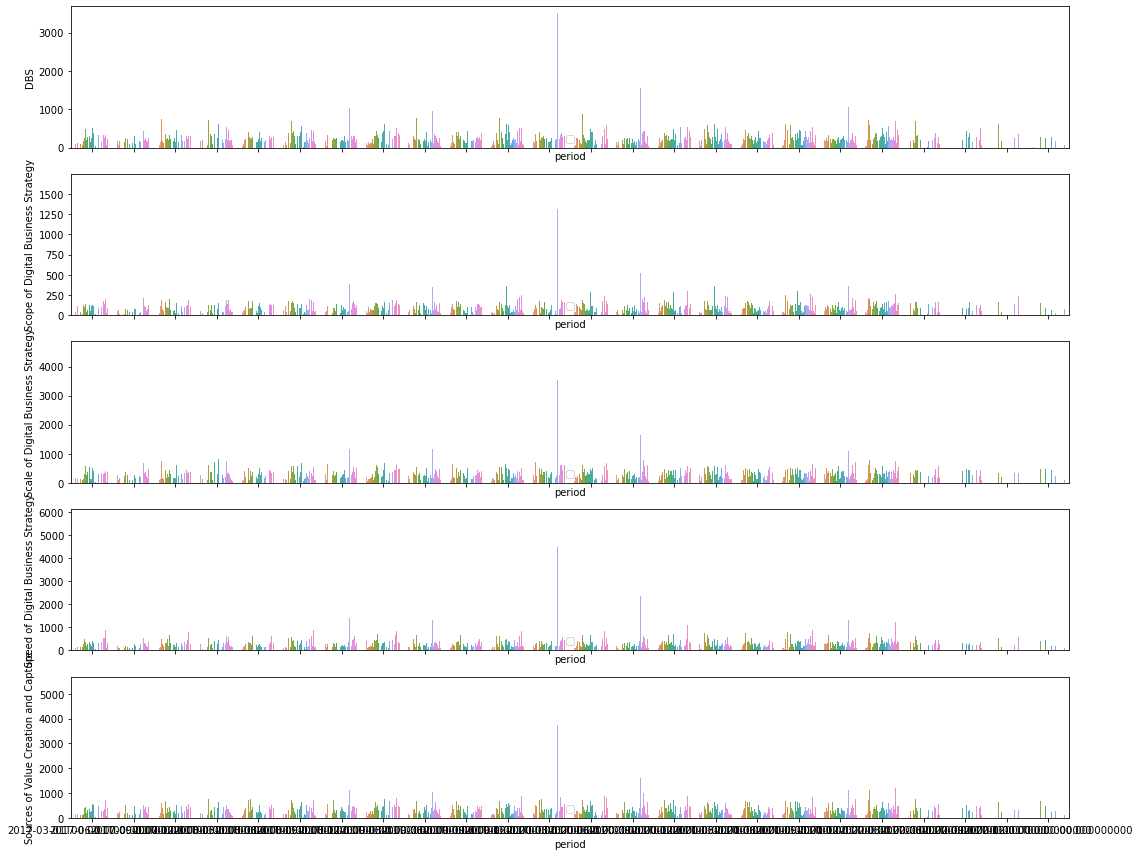

In [5]:
fig, ax = plt.subplots(5,1, figsize=(16,12), sharex=True)

sns.barplot(data=df,x='period',y='DBS', hue='company', ax=ax[0],)

sns.barplot(data=df,x='period',y='Scope of Digital Business Strategy', hue='company', ax=ax[1])
sns.barplot(data=df,x='period',y='Scale of Digital Business Strategy', hue='company', ax=ax[2])
sns.barplot(data=df,x='period',y='Speed of Digital Business Strategy', hue='company', ax=ax[3])
sns.barplot(data=df,x='period',y='Sources of Value Creation and Capture', hue='company', ax=ax[4])

[ax[i].legend([]) for i in range(0,5)]

plt.tight_layout()

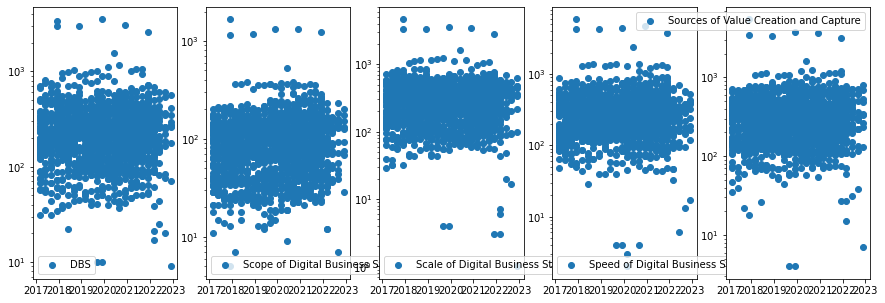

In [19]:

fig, ax = plt.subplots(1,5, figsize=(15,5))

topics = df.columns[3:]
for i, t in enumerate(topics):
    ax[i].scatter(df.period, df[t], label=t)
    ax[i].legend()
    ax[i].set_yscale('log')
    #ax[i].set_xticks([],[])

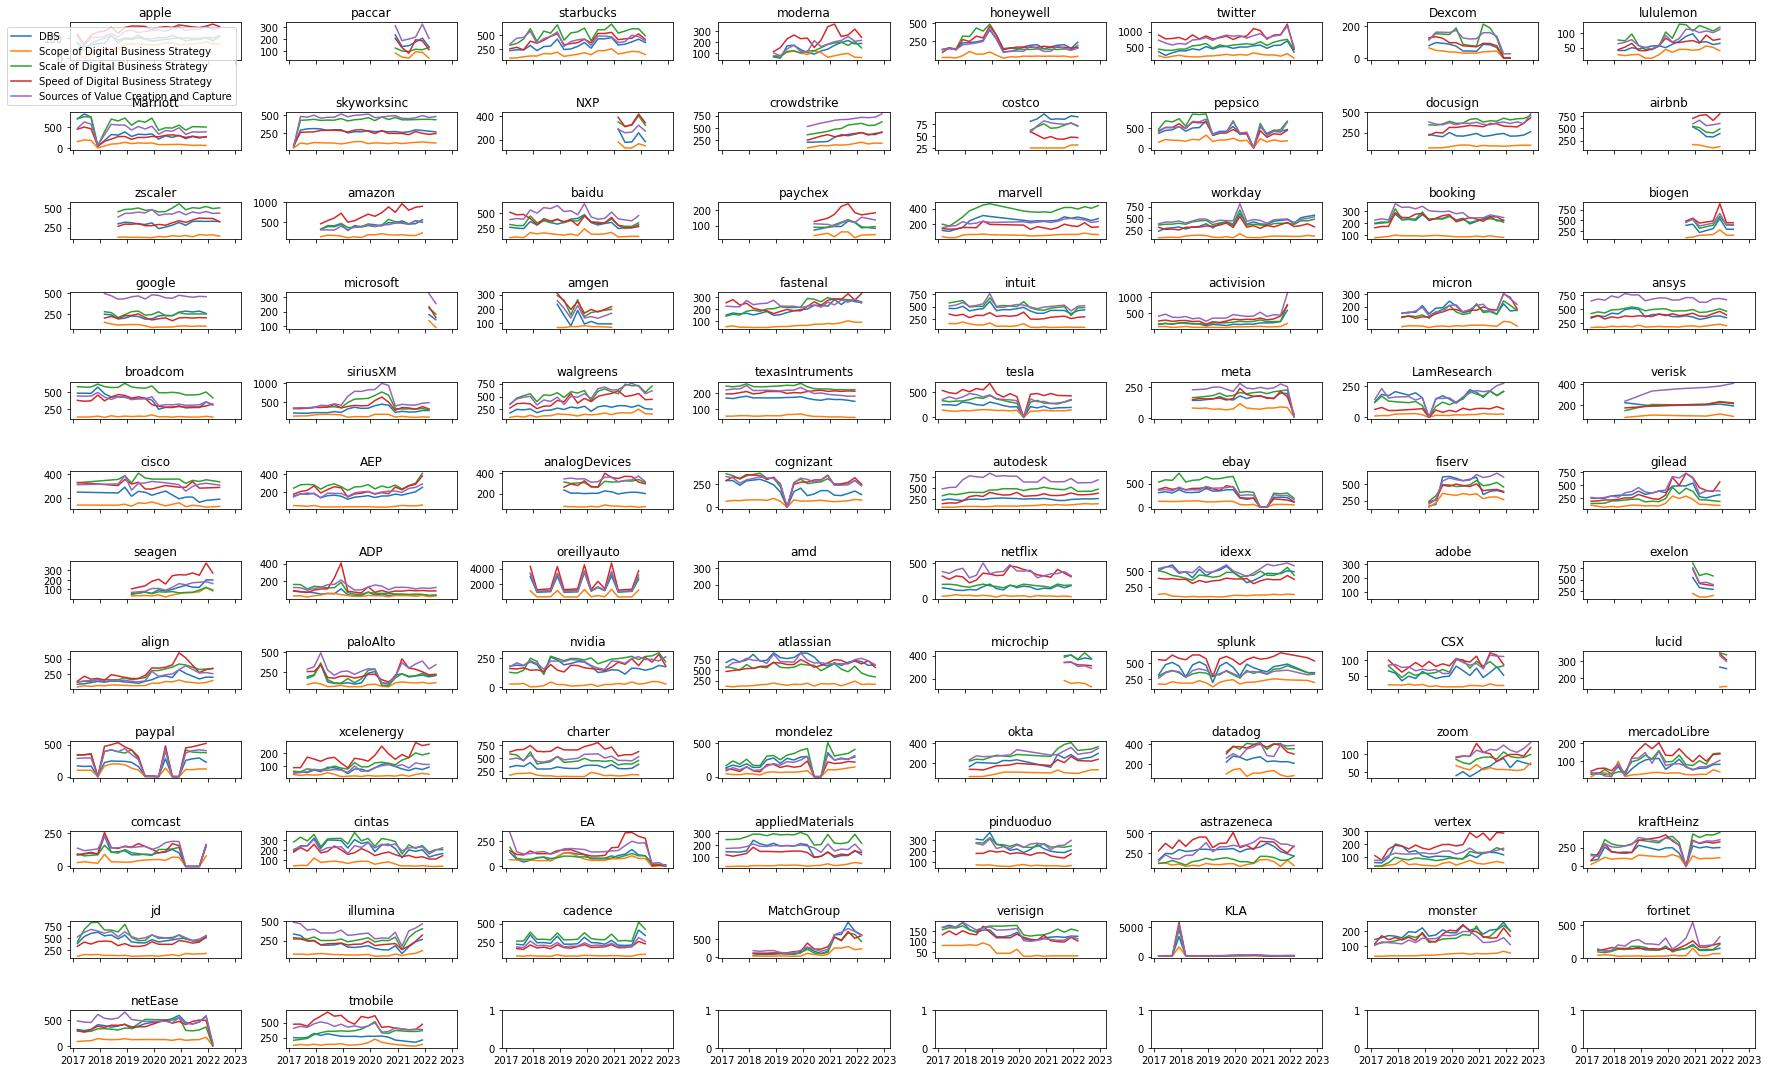

In [20]:
cols = 8
fig, ax = plt.subplots(len(companies)//cols+1,cols, figsize=(25,15), sharex=True)
for index, company in enumerate(companies):
    ax_index = index//ax.shape[1], index%ax.shape[1] 
    for i, t in enumerate(topics):

        df2 =df[df['company'] == company]
        ax[ax_index].plot(df2.period, df2[t], label=t)
        ax[ax_index].set_title(company)

ax[0,0].legend()
plt.tight_layout()
plt.savefig('new_all.png', dpi=600)
        

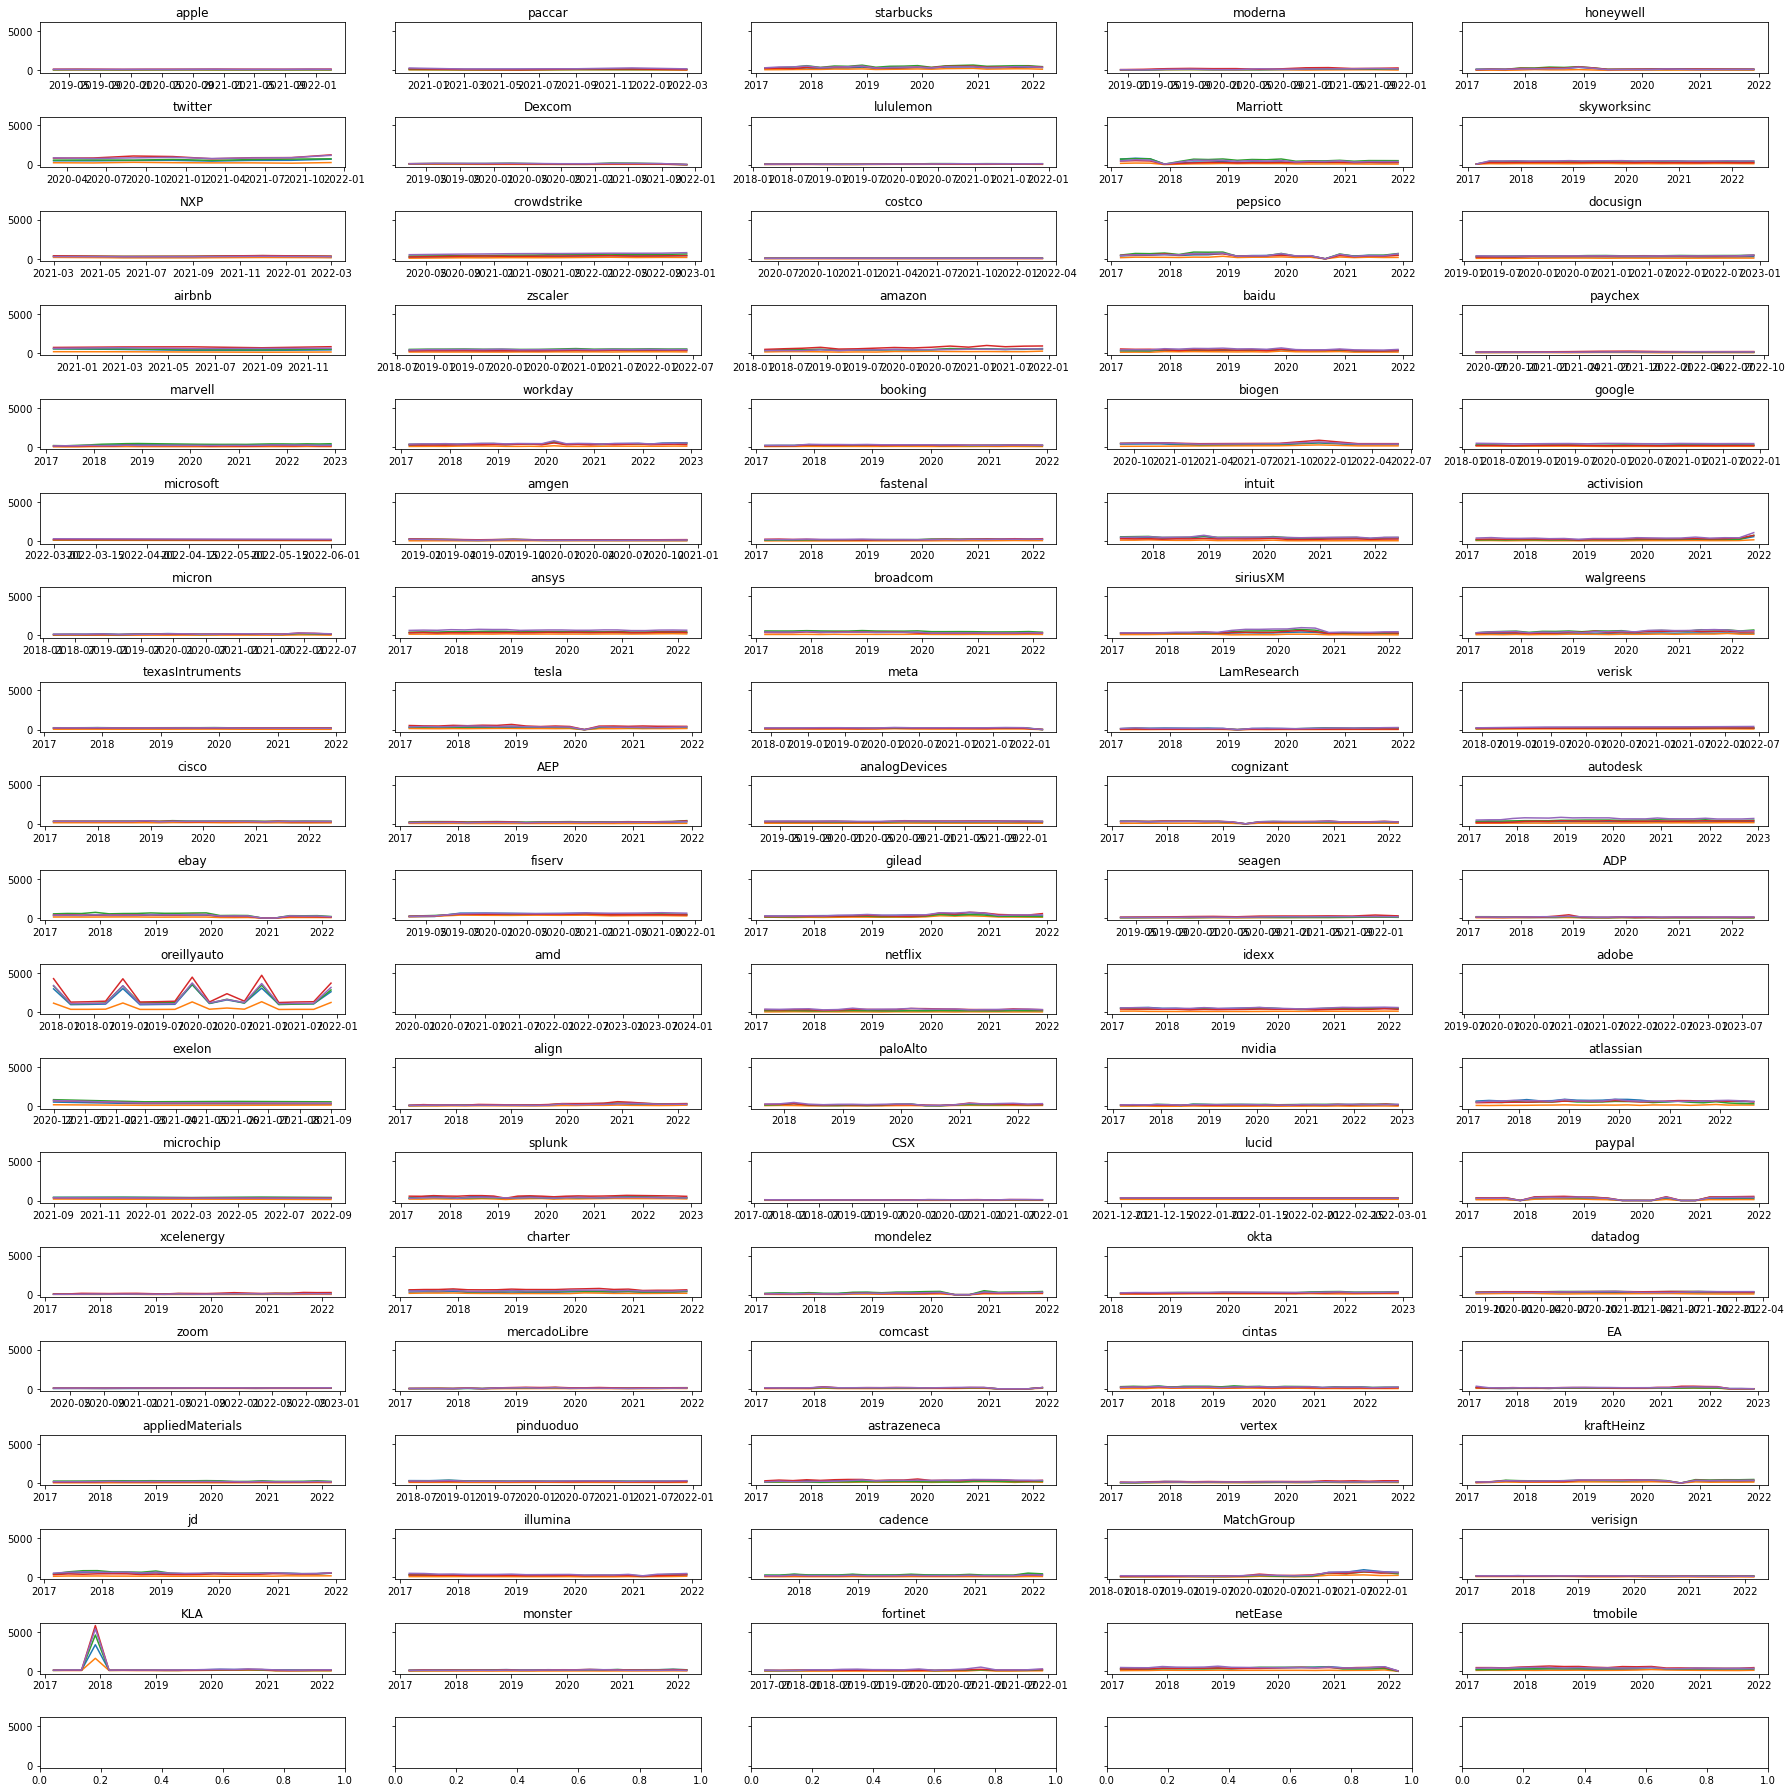

In [110]:
cols = 5
fig, ax = plt.subplots(len(companies)//cols+1,cols, figsize=(25,25),sharey=True)
for index, company in enumerate(companies):
    ax_index = index//ax.shape[1], index%ax.shape[1] 
    for i, t in enumerate(topics):

        df2 =df[df['company'] == company]
        ax[ax_index].plot(df2.period, df2[t], label=t)
        ax[ax_index].set_title(company)

#ax[0,0].legend()
plt.tight_layout()
        

### bubble plot-> a bunch of pies

In [30]:
cat

'Sources of Value Creation and Capture'

## How good is the keyword dictionary?
* word count, like mathches for each term
* 

In [93]:
### Total Hits

In [15]:
matches_on_words = {}


matches_on_words_company = {}
for company in companies:
    matches_on_words_company[company] = {}

    
matches_on_words_quarter = {}
for quarter in df.level_1.apply(lambda x: ''.join(x.split('_')[1:])).unique():
    matches_on_words_quarter[quarter] = {}


companies = text_dict.keys()
for company in tqdm(companies):
    
    reports = text_dict[company].keys()
    for report in reports:
        string = text_dict[company][report]['text']
        for cat in keyword_dict.keys():
            count = 0
            for index in keyword_dict[cat].keys():
                (text, lemmas, stems) =     (keyword_dict[cat][index]['text'], 
                                            keyword_dict[cat][index]['lemmas'], 
                                            keyword_dict[cat][index]['stems'])
                found = False
                while found == False:
                    for i in [text, lemmas, stems]:
                        if type(i) == list:
                            i = ' '.join(i)
                        finding = count_re_matches_diff(i, string)
                        if (finding != 0 and found == False):
                            if text in matches_on_words.keys():
                                matches_on_words[text]['count'] += 1
                            else:
                                matches_on_words[text] = {'count' : 1, 'category':cat}
                                
                            if text in matches_on_words_company[company].keys():
                                matches_on_words_company[company][text] += 1
                            else:
                                matches_on_words_company[company][text] = 1
                                
                            quarter = ''.join(report.split('_')[1:])
                            if text in matches_on_words_quarter[quarter].keys():
                                matches_on_words_quarter[quarter][text] += 1
                            else:
                                matches_on_words_quarter[quarter][text] = 1
                            
                            count += finding
                            found=True
                            break
                    break
                    


100%|███████████████████████████████████████████| 90/90 [02:06<00:00,  1.41s/it]


In [28]:
matches_on_words_df = pd.DataFrame.from_dict(matches_on_words).T.sort_values('count', ascending=False).reset_index()
matches_on_words_df = matches_on_words_df
matches_on_words_df

,index,count,category
0,sharing,2920,DBS
1,information,2880,Scope of Digital Business Strategy
2,availability,2698,Scale of Digital Business Strategy
3,continuous,2634,DBS
4,competitive,2376,Scope of Digital Business Strategy
...,...,...,...
373,web services,1,Scale of Digital Business Strategy
374,multi-disciplinary,1,Scope of Digital Business Strategy
375,first-mover,1,Speed of Digital Business Strategy
376,application programming interfaces,1,Scale of Digital Business Strategy


In [29]:
matches_on_words_df.to_csv('../data/matches_on_words_df{}.csv'.format(date_today))

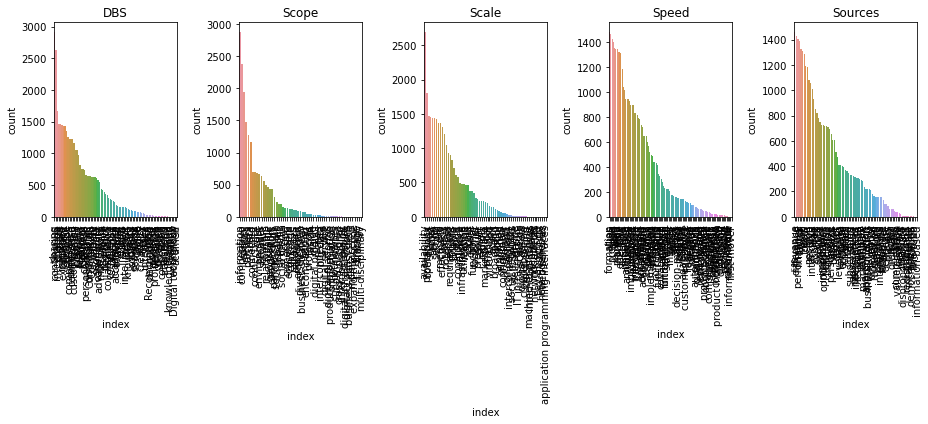

In [17]:
fig, ax = plt.subplots(1,5, figsize=(13,6))

for index, cat in enumerate(matches_on_words_df.category.unique()):
    
    sns.barplot(data=matches_on_words_df[matches_on_words_df.category == cat],
                x='index', y='count', ax=ax[index]);
    ax[index].set_xticklabels(ax[index].get_xticklabels(),rotation = 90);
    ax[index].set_title(cat.split()[0])
    
plt.tight_layout()

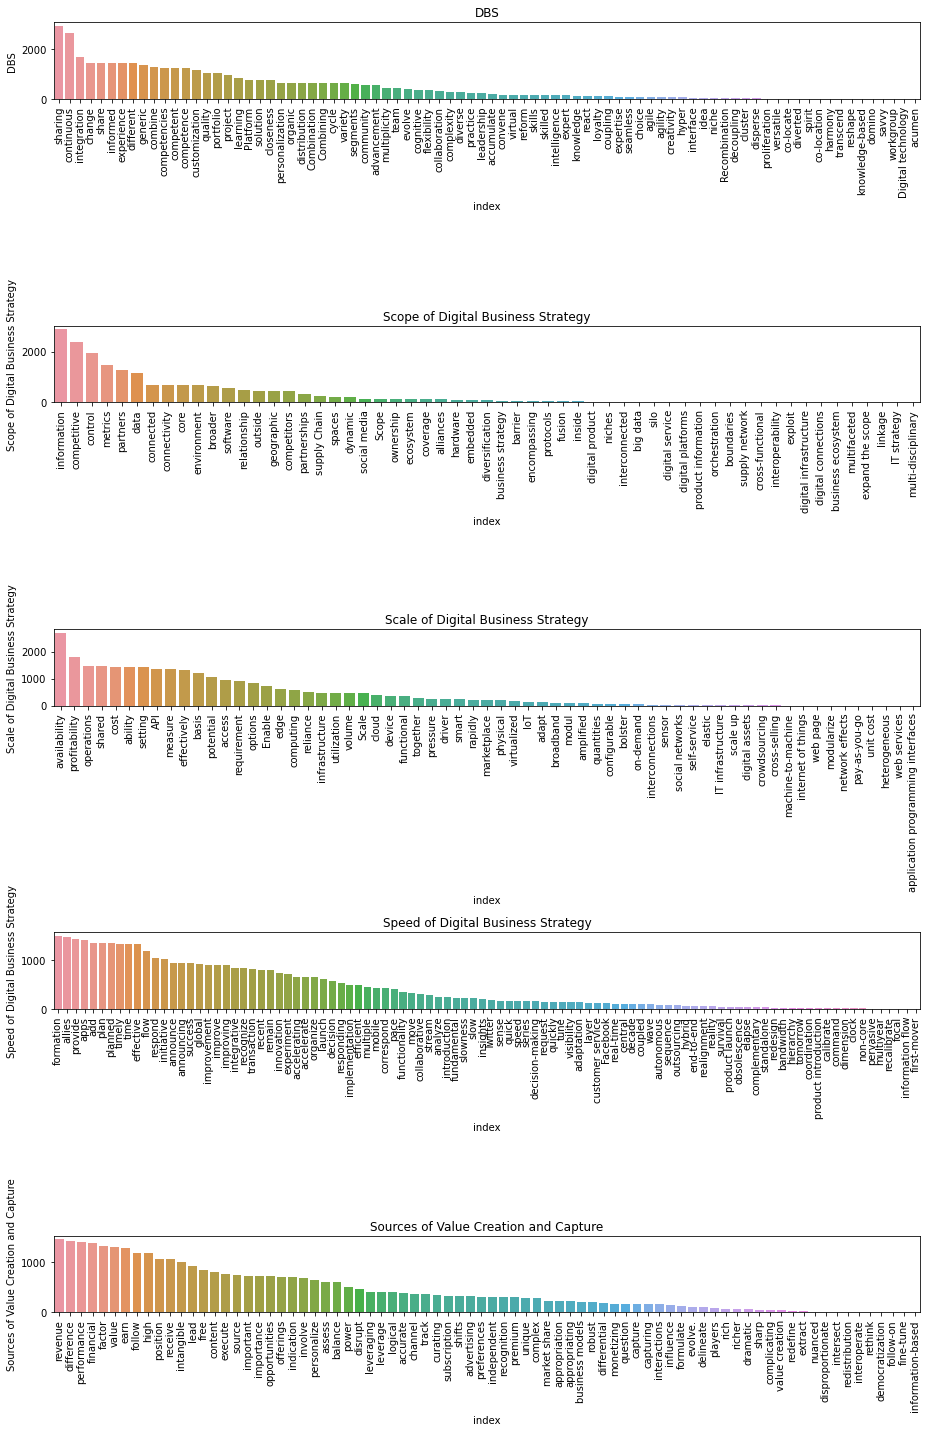

In [18]:


fig, ax = plt.subplots(5,1, figsize=(13,20))

for index, cat in enumerate(matches_on_words_df.category.unique()):
    
    sns.barplot(data=matches_on_words_df[matches_on_words_df.category == cat],
                x='index', y='count', ax=ax[index]);
    ax[index].set_xticklabels(ax[index].get_xticklabels(),rotation = 90);
    ax[index].set_title(cat)
    ax[index].set_ylabel(cat)
plt.tight_layout()
plt.savefig('figures/Dictionary_hits_01.png', dpi=400)

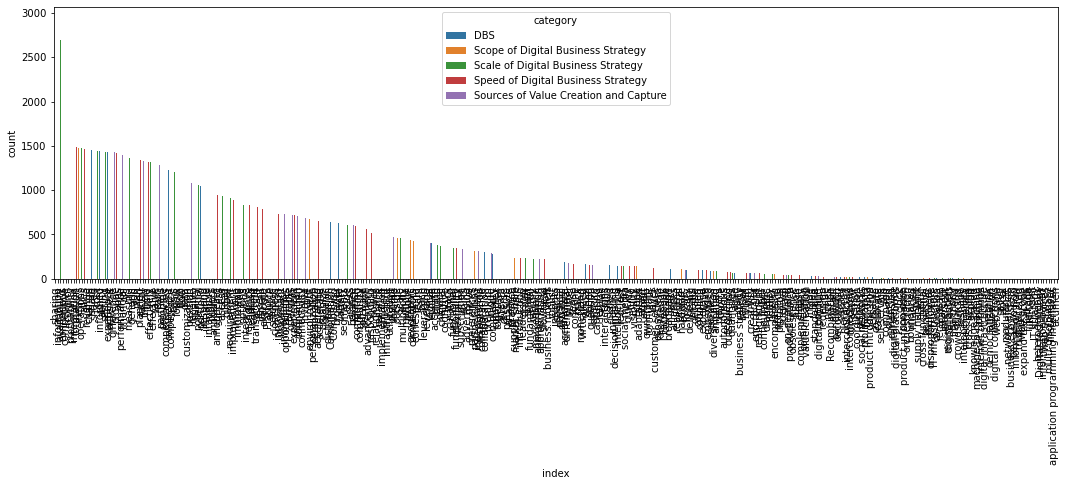

In [19]:
fig, ax = plt.subplots(figsize=(18,5))
sns.barplot(data=matches_on_words_df, x='index', y='count',  hue='category', ax=ax);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

In [30]:
pd.DataFrame.from_dict(matches_on_words_company).to_csv('../data/matches_on_words_company_df{}.csv'.format(date_today))

In [21]:
count = 0
companies = text_dict.keys()
for company in tqdm(companies):
    
    reports = text_dict[company].keys()
    for report in reports:
        count +=1
        
count

100%|████████████████████████████████████████| 90/90 [00:00<00:00, 71331.70it/s]


1511

In [22]:
T = [[keyword_dict[cat][i]['text'] for i in keyword_dict[cat].keys()] for cat in keyword_dict.keys()]
#t_flat = t[0]+t[1]+t[2]+t[3]+t[4]

In [ ]:
for cat, T1 in zip(keyword_dict.keys(), T):
    print('\n### '+ cat+' ###')
    for t in T1:
        if t not in matches_on_words_df['index'].unique():
            print(t)

## ML
- kMeans
- look for similarity of variables

In [ ]:
X = df.values[:,3:]

np.shape(X)


In [ ]:
# Account for term frequency

# TFIDF



## Performance

In [23]:
dd = {}
for i in [[keyword_dict[cat][index]['text'] for index in keyword_dict[cat].keys()] for cat in keyword_dict]:
    for j in i:
        if j in dd:
            dd[j] += 1
        else:
            dd[j] =1

In [27]:
pd.DataFrame.from_dict(dd, orient='index').sort_values(0, ascending=False)

,0
learning,3
competitive,2
experience,2
flexibility,2
social media,2
...,...
connectivity,1
big data,1
data,1
protocols,1


In [128]:
pd.DataFrame.from_dict(keyword_dict)

,DBS,Scope of Digital Business Strategy,Scale of Digital Business Strategy,Speed of Digital Business Strategy,Sources of Value Creation and Capture
0,"{'text': 'Digital technology', 'lemmas': ['Dig...","{'text': 'Scope', 'lemmas': ['scope'], 'stems'...","{'text': 'Scale', 'lemmas': ['scale'], 'stems'...","{'text': 'speed', 'lemmas': ['speed'], 'stems'...","{'text': 'source', 'lemmas': ['source'], 'stem..."
1,"{'text': 'Digital era', 'lemmas': ['Digital', ...","{'text': 'fusion', 'lemmas': ['fusion'], 'stem...","{'text': 'rapidly', 'lemmas': ['rapidly'], 'st...","{'text': 'accelerate', 'lemmas': ['accelerate'...","{'text': 'value', 'lemmas': ['value'], 'stems'..."
2,"{'text': 'Digital resources', 'lemmas': ['Digi...","{'text': 'integration', 'lemmas': ['integratio...","{'text': 'effectively', 'lemmas': ['effectivel...","{'text': 'accelerating', 'lemmas': ['accelerat...","{'text': 'capture', 'lemmas': ['capture'], 'st..."
3,"{'text': 'Platform', 'lemmas': ['platform'], '...","{'text': 'IT strategy', 'lemmas': ['it', 'stra...","{'text': 'IT infrastructure', 'lemmas': ['it',...","{'text': 'product launch', 'lemmas': ['product...","{'text': 'leveraging', 'lemmas': ['leverage'],..."
4,"{'text': 'Recombination/Integration', 'lemmas'...","{'text': 'barrier', 'lemmas': ['barrier'], 'st...","{'text': 'infrastructure', 'lemmas': ['infrast...","{'text': 'just-in-time', 'lemmas': ['just', '-...","{'text': 'leverage', 'lemmas': ['leverage'], '..."
...,...,...,...,...,...
111,NaN,NaN,NaN,"{'text': 'tomorrow', 'lemmas': ['tomorrow'], '...",NaN
112,NaN,NaN,NaN,"{'text': 'realignment', 'lemmas': ['realignmen...",NaN
113,NaN,NaN,NaN,"{'text': 'adaptation', 'lemmas': ['adaptation'...",NaN
114,NaN,NaN,NaN,"{'text': 'apps', 'lemmas': ['app'], 'stems': [...",NaN
